<a href="https://colab.research.google.com/github/asu-trans-ai-lab/OSM2GMNS/blob/master/osm2gmns_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __OSM2GMNS Quickstart Notebook__

OSM2GMNS is a Python package that helps generate high-fidelity mesoscopic transportation network models from OpenStreetMap data. This enables even the smallest transportation authorities to begin analysis with a high quality network model for future analysis. 


# 1. Data Collection
We rely on a few open-source projects to gather the raw data to start our analysis. Export data from your area of interest from the following sources.
 * __OpenStreetMap base map__: https://www.openstreetmap.org/export
   * __Geofabrik__: Alternative for non-rectangular Areas of Interest: http://download.geofabrik.de/
 * __Bike Transport Info__ (Optional):  https://extract.bbbike.org

For this demonstration, we'll use sample data from the ASU Transit AI Lab Github

osm2gmns also enables users to download OSM data within the region of interest using a built-in function. A region can be a state, city, or even university. On OpenStreetMap homepage, search the region name to get its unique relation id. The following example shows how to download Tempe city OSM data using function downloadOSMData.

https://www.openstreetmap.org/#map=18/33.42141/-111.93472&layers=DG 

# 2. Install the osm2gmns package

In [3]:
!pip install osm2gmns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 3. Create a network model from OpenStreetMap exports

In [5]:
# Import osm2gmns with the alias as "og" (easier to type)
import osm2gmns as og
# relation id for Manhattan  is 8398124
# relation id for City of Tempe is 110833.
og.downloadOSMData(110833, 'map.osm')
# Generate a net from the Tempe, AZ OpenStreetMap export and include Points of Interest (POI=True)


valid reponses got from API server.
receving data...
map data has been written to map.osm


arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: ('motorway', 'trunk', 'primary', 'secondary')
  POI: False
  POI_sampling_ratio: 1.0
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
  number of nodes: 2258, number of links: 3201, number of pois: 0


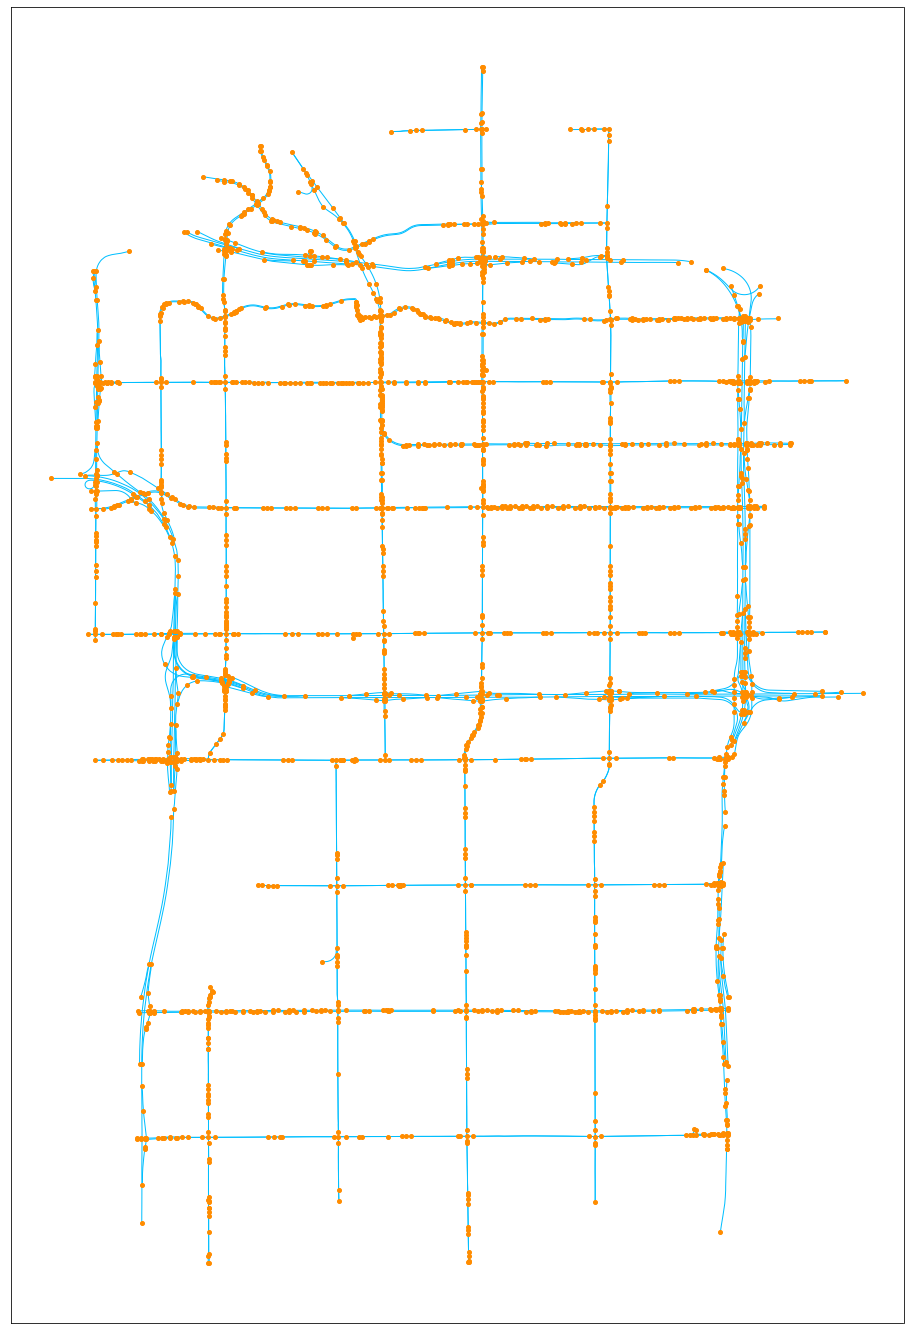

In [6]:
input_file = 'map.osm'
net = og.getNetFromFile(input_file, link_types=('motorway','trunk','primary','secondary')) 

# Use og.show(net) to visualize the network model
og.show(net)

#4. Modify the network model 

## Example: Consolidate Complex Intersections 
Intersections can have lots of nodes representing different turn lanes, crosswalks, etc. 

Using og.consolidateComplexIntersections(net), we can combine nodes in intersections into a single node to make analysis faster and simpler

Consolidating Complex Intersections
    0 intersections have been consolidated


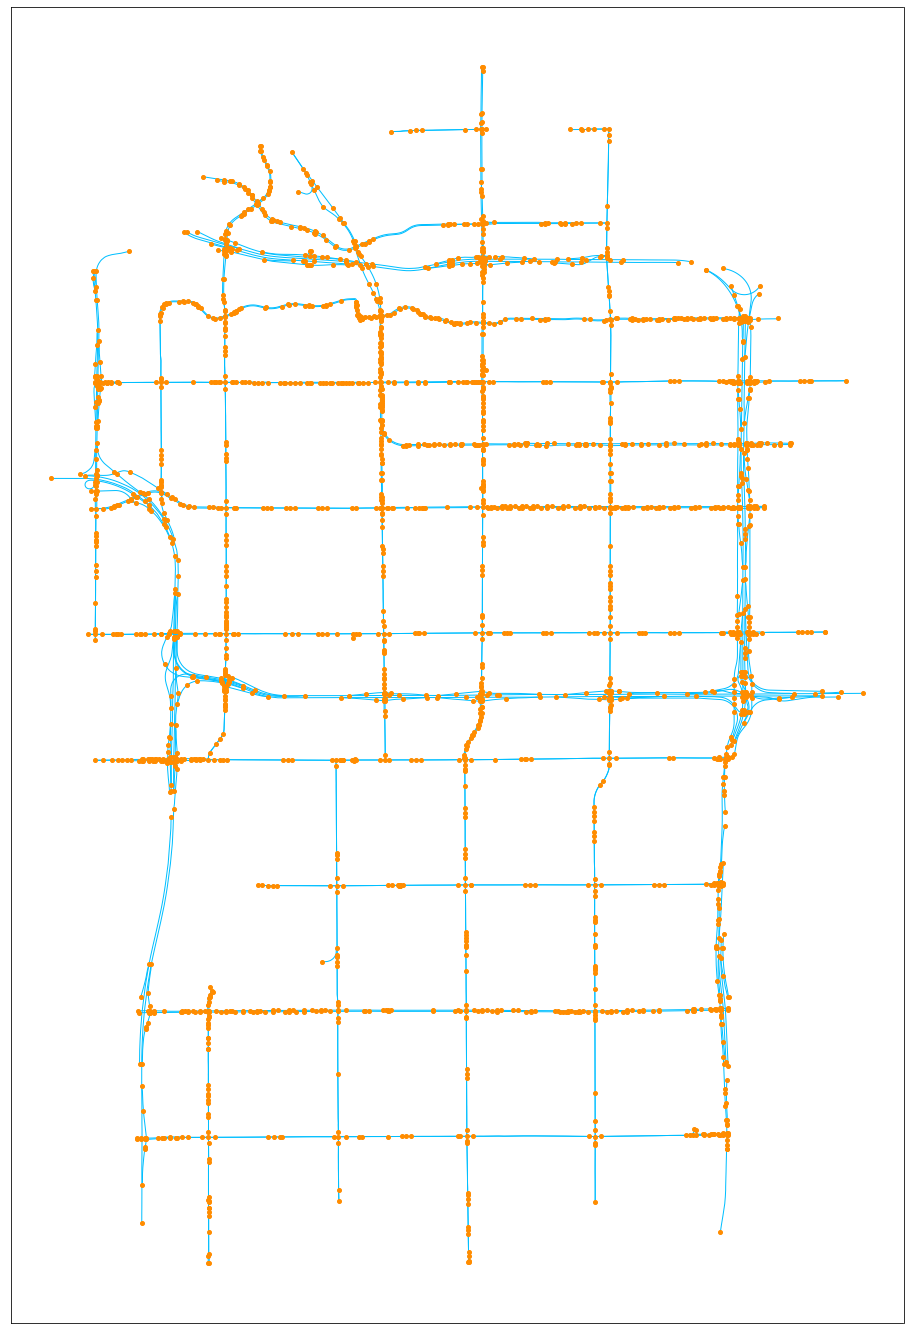

In [7]:
og.consolidateComplexIntersections(net)
og.show(net)

## Example: Points of Interest

We can connect Points of Interest (POIs) to the network model. Nodes representing the center (centroids) of POIs are generated. These nodes are connected with a link to the nearest node on the rest of the network

In [9]:
net = og.getNetFromFile('map.osm', link_types=('motorway','trunk','primary','secondary'), POI=True, POI_sampling_ratio=0.05)
og.connectPOIWithNet(net)
og.show(net)

arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: ('motorway', 'trunk', 'primary', 'secondary')
  POI: True
  POI_sampling_ratio: 0.05
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
    generating POIs


ValueError: ignored

#5. Export transportation network model

We can export our transportation network model to a CSV format for ease of use in further analysis with other systems. 

og.outputNetToCSV(...) will generate two files: node.csv representing nodes, and link.csv representing links (edges) between nodes.

In [10]:

og.outputNetToCSV(net)

Outputting Network Files


In [11]:
"""
Take a peek at the format of the CSVs using the Pandas library
Loading the CSV files gives us a DataFrame object which is very heavily used in 
data science and analysis. 

For more information on how this data is organized, check out the GMNS specification

https://github.com/zephyr-data-specs/GMNS/pull/54

"""

import pandas as pd

node_dataframe = pd.read_csv("node.csv")
node_dataframe.head()

,name,node_id,osm_node_id,osm_highway,zone_id,ctrl_type,node_type,activity_type,is_boundary,x_coord,y_coord,intersection_id,poi_id,notes
0,NaN,0,255734122,motorway_junction,NaN,NaN,NaN,NaN,NaN,-111.967843,33.392281,NaN,NaN,NaN
1,NaN,1,255734135,NaN,NaN,NaN,NaN,NaN,NaN,-111.968218,33.384241,NaN,NaN,NaN
2,NaN,2,41216719,traffic_signals,NaN,signal,NaN,NaN,NaN,-111.978302,33.407317,NaN,NaN,NaN
3,NaN,3,41216716,traffic_signals,NaN,signal,NaN,NaN,NaN,-111.978180,33.409340,NaN,NaN,NaN
4,NaN,4,316115414,NaN,NaN,NaN,NaN,NaN,NaN,-111.978250,33.434822,NaN,NaN,NaN


In [12]:
link_dataframe = pd.read_csv("link.csv")
link_dataframe.head()

,name,link_id,osm_way_id,from_node_id,to_node_id,dir_flag,length,lanes,free_speed,capacity,link_type_name,link_type,geometry,allowed_uses,from_biway,is_link,VDF_fftt1,VDF_cap1
0,NaN,0,5561308,0,1,1,913.03,1.0,NaN,NaN,motorway,1,"LINESTRING (-111.9678428 33.3922814, -111.9679...",auto,0,1,NaN,NaN
1,South 48th Street,1,5562004,2,3,1,227.07,3.0,NaN,NaN,secondary,4,"LINESTRING (-111.9783020 33.4073175, -111.9781...",auto,0,0,NaN,NaN
2,NaN,2,5563368,4,5,1,524.77,1.0,NaN,NaN,motorway,1,"LINESTRING (-111.9782495 33.4348217, -111.9782...",auto,0,1,NaN,NaN
3,NaN,3,5564407,6,7,1,265.27,1.0,NaN,NaN,motorway,1,"LINESTRING (-111.9678618 33.4038037, -111.9678...",auto,0,1,NaN,NaN
4,NaN,4,5565077,8,9,1,445.40,1.0,NaN,NaN,motorway,1,"LINESTRING (-111.9338921 33.3857087, -111.9351...",auto,0,1,NaN,NaN


In [13]:
link_dataframe = pd.read_csv("poi.csv")
link_dataframe.head()

FileNotFoundError: ignored

#6. Basic analysis with Pandas

The node and link files are in CSV format, which can be used with a wide variety of programming languages, such as R, and programs, such as Excel.

Here, we show a quick demonstration of some simple analysis using Python

In [14]:
# From the previous cells, we have pandas DataFrame objects representing the node and link data for our model
print(node_dataframe.head(), link_dataframe.head())

  name  node_id  osm_node_id        osm_highway  zone_id ctrl_type  node_type  \
0  NaN        0    255734122  motorway_junction      NaN       NaN        NaN   
1  NaN        1    255734135                NaN      NaN       NaN        NaN   
2  NaN        2     41216719    traffic_signals      NaN    signal        NaN   
3  NaN        3     41216716    traffic_signals      NaN    signal        NaN   
4  NaN        4    316115414                NaN      NaN       NaN        NaN   

   activity_type  is_boundary     x_coord    y_coord  intersection_id  poi_id  \
0            NaN          NaN -111.967843  33.392281              NaN     NaN   
1            NaN          NaN -111.968218  33.384241              NaN     NaN   
2            NaN          NaN -111.978302  33.407317              NaN     NaN   
3            NaN          NaN -111.978180  33.409340              NaN     NaN   
4            NaN          NaN -111.978250  33.434822              NaN     NaN   

   notes  
0    NaN  
1   